In [14]:
import numpy as np
from matplotlib import pyplot as plt

from icecream import ic

from read_dataset import read_images, read_labels

In [2]:
train_images = read_images('./train-images.idx3-ubyte')
train_labels = read_labels('./train-labels.idx1-ubyte')

print("Train images dataset size:", train_images.shape)
print("Train labels dataset size:", train_labels.shape)
print("Each image shape:", train_images[0].shape)

Train images dataset size: (60000, 28, 28)
Train labels dataset size: (60000,)
Each image shape: (28, 28)


In [3]:
# train_images = train_images.astype('float64') / 255.0
train_images = train_images.astype('float64') / 256.0

In [4]:
np.random.seed(42)

# Part 1

The 10 images of each of the digits

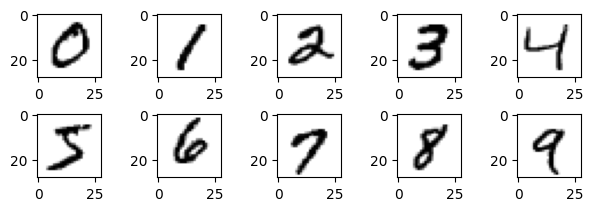

In [5]:
nrows = 2
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(6,2), layout='constrained')

for i in range(10):
    axes[i // ncols][i % ncols].imshow(train_images[np.where(train_labels == i)][0], cmap="binary")

# Part 2

Implement a function that computes the network below

![](./images/part2-network.png)

In [6]:
def softmax(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x, axis=0, keepdims=True)

In [7]:
class NN:
    def __init__(self, n1 = 784, n2 = 10):
        self.n1 = n1
        self.n2 = n2

        # random values are generated too big, so just make
        # them smaller with the multiplication
        self.W = np.random.random((self.n1, self.n2)) * 0.1
        self.B = np.random.random((self.n2, 1)) * 0.1


    def forward_propagation(self, images):
        imgs = np.reshape(images, (images.shape[0], -1)).T
        z = np.dot(self.W.T, imgs) + self.B
        return softmax(z)

In [8]:
nn = NN()

batch = train_images[0:5]
preds = nn.forward_propagation(batch)

# Part 3

For this project, we will be using the the sum of the negative log-probabilities of the correct answer for the N training cases under consideration as the cost function.
(I.e., the negative log-likelihood of the training set.)

Implement a function that computes the gradient of this cost function with respect to the parameters of the network (W and b), for a given subset of training cases.
Include a listing of your implementation in your report for this Part. You can, but do not have to, vectorize your code.

Assume that our network is a function
$$ \sigma \left( \bm{z} \right) $$
where $\bm{z}$ is
$$ \bm{z} = \bm{W} \bm{x} + \bm{b} $$

So the loss function is:

$$ L = - \sum y \odot \log (\sigma(\bm{z})) $$

In [9]:
class NN:
    def __init__(self, n1 = 784, n2 = 10):
        self.n1 = n1
        self.n2 = n2

        # random values are generated too big, so just make
        # them smaller with the multiplication
        self.W = np.random.random((self.n1, self.n2)) * 0.1
        self.B = np.random.random((self.n2, 1)) * 0.1


    def forward_propagation(self, images):
        # flatten the images and present them in a batched form
        # the dimensions would be (batch_size, 784)
        # -1 is a magic number for numpy here
        imgs = np.reshape(images, (images.shape[0], -1)).T
        z = np.dot(self.W.T, imgs) + self.B
        return NN.activation(z)
    

    def gradients(self, images, labels):
        probabilities = self.forward_propagation(images)
        y = self.one_hot_encoding(labels)

        dL_dz = probabilities - y
        # need to flatten the images in a batch again
        x = np.reshape(images, (images.shape[0], -1)).T
        # and each dL_dz should be multiplied by dz_dw
        # by this operation we get rid of batch dimension
        dW = x @ dL_dz.T
        dB = dL_dz.sum(axis=1).reshape(-1, 1)
        return dW, dB


    @staticmethod
    def activation(x):
        """
        The activation function.
        Softmax.
        """
        # e_x = np.exp(x)
        e_x = np.exp(x - np.max(x, axis=0))
        return e_x / np.sum(e_x, axis=0, keepdims=True)


    @staticmethod
    def one_hot_encoding(labels, n_classes = 10):
        """
        Represent labels in a one-hot matrix form.
        The encoding would have shape (n_classes, n_labels).
        Means that there would be 1 in each column for
        row i as for class i.
        """
        y = np.zeros((n_classes, labels.size))
        y[labels, np.arange(labels.size)] = 1
        return y


    @staticmethod
    def loss(result, labels):
        """
        The loss function of this neural network.
        Negative Log Likelyhood is used here.
        """
        y = NN.one_hot_encoding(labels)
        terms = - y * np.log(result)
        return np.sum(terms)



In [10]:
images = train_images[0:2]
labels = train_labels[0:2]

nn = NN()

dw, db = nn.gradients(images, labels)
ic(dw, db)

ic| dw: array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]])
    db: array([[-0.82732082],
               [ 0.1217116 ],
               [ 0.22523305],
               [ 0.25123608],
               [ 0.19936141],
               [-

0.83155516],
               [ 0.25668369],
               [ 0.17535109],
               [ 0.28530526],
               [ 0.14399379]])


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[-0.82732082],
        [ 0.1217116 ],
        [ 0.22523305],
        [ 0.25123608],
        [ 0.19936141],
        [-0.83155516],
        [ 0.25668369],
        [ 0.17535109],
        [ 0.28530526],
        [ 0.14399379]]))

# Part 4

Verify that you are computing the gradient in Part 3 correctly by computing it both using your function and using a finite-difference approximation for several
coordinates of the W and b. In your report for this Part, include the listing of the code that you used and the output of the code (which should include both your
precise gradient and the approximation).

In [11]:
batch_start = 50
batch_size = 5
batch_images = train_images[batch_start:batch_start + batch_size]
batch_labels = train_labels[batch_start:batch_start + batch_size]

nn = NN()

actual_dW, actual_dB = nn.gradients(batch_images, batch_labels)

In [12]:

# now try to compute the approximation of the gradients
epsilon = 1e-5
approx_dW, approx_dB = np.zeros_like(actual_dW), np.zeros_like(actual_dB)

for i in range(nn.W.shape[0]):
    for j in range(nn.W.shape[1]):
        nn.W[i, j] += epsilon
        loss_plus_epsilon = nn.loss(
            nn.forward_propagation(batch_images),
            batch_labels
        )
        nn.W[i, j] -= 2 * epsilon
        loss_minus_epsilon = nn.loss(
            nn.forward_propagation(batch_images),
            batch_labels
        )
        # print(loss_minus_epsilon)
        # now need to reset back to original value
        nn.W[i, j] += epsilon
        approx_dW[i, j] = (loss_plus_epsilon - loss_minus_epsilon) / (2 * epsilon)

for i in range(nn.B.shape[0]):
    # for j in range(nn.B.shape[1]):
        nn.B[i, 0] += epsilon
        loss_plus_epsilon = nn.loss(
            nn.forward_propagation(batch_images),
            batch_labels
        )
        nn.B[i, 0] -= 2 * epsilon
        loss_minus_epsilon = nn.loss(
            nn.forward_propagation(batch_images),
            batch_labels
        )
        # now need to reset back to original value
        nn.B[i, 0] += epsilon
        approx_dB[i, 0] = (loss_plus_epsilon - loss_minus_epsilon) / (2 * epsilon)



In [13]:
ic(actual_dW[actual_dW != 0])
ic(approx_dW[approx_dW != 0])

ic| actual_dW[actual_dW != 0]: array([ 0.00400982,  0.00383669,  0.00598306, ..., -0.5726779 ,
                                       0.06520442, -0.06895977])
ic| approx_dW[approx_dW != 0]: array([ 0.00400982,  0.00383669,  0.00598306, ..., -0.5726779 ,
                                       0.06520442, -0.06895977])


array([ 0.00400982,  0.00383669,  0.00598306, ..., -0.5726779 ,
        0.06520442, -0.06895977])

In [14]:
ic(actual_dB)
ic(approx_dB)

ic| actual_dB: array([[-0.39148031],
                      [ 0.52423538],
                      [ 0.47420866],
                      [-0.45247995],
                      [-0.54311874],
                      [ 0.47941254],
                      [ 0.42896738],
                      [-0.53070874],
                      [ 0.55003813],
                      [-0.53907434]])
ic| approx_dB

: array([[-0.39148031],
                      [ 0.52423538],
                      [ 0.47420866],
                      [-0.45247995],
                      [-0.54311874],
                      [ 0.47941254],
                      [ 0.42896738],
                      [-0.53070874],
                      [ 0.55003813],
                      [-0.53907434]])


array([[-0.39148031],
       [ 0.52423538],
       [ 0.47420866],
       [-0.45247995],
       [-0.54311874],
       [ 0.47941254],
       [ 0.42896738],
       [-0.53070874],
       [ 0.55003813],
       [-0.53907434]])

In [15]:
print("dW approximation error: ", np.linalg.norm(approx_dW - actual_dW))
print("dB approximation error: ", np.linalg.norm(approx_dB - actual_dB))

dW approximation error:  3.4938336023606846e-09
dB approximation error:  2.4940903778749466e-10


# Part 5

Write code to minimize your the cost function using mini-batch gradient descent, using the training set provided to you. You should be able to obtain test
classification performance of over 91% correct classification (anything above 89% is OK). A learning rate of about 0.01 and batch sizes of 50 should work well.

For the training and the test set, graph the negative-log probability of the correct answer and correct classification rate versus the number of updates to the weights
and biases during training. (I.e., plot the learning curves.)

In your report, display 20 digits which were classified correctly, and 10 digits from the test set which were classified incorrectly.

In [16]:
# as we will later add more methods to the class
# it would be useful to use this decorator
def add_methods_to(klass):
    def decorator(func):
        setattr(klass, func.__name__, func)
        return func
    return decorator

In [17]:
test_images = read_images('./t10k-images.idx3-ubyte')
test_labels = read_labels('./t10k-labels.idx1-ubyte')

print(f"{test_images.shape=}")
print(f"{test_labels.shape=}")

test_images.shape=(10000, 28, 28)
test_labels.shape=(10000,)


In [18]:
@add_methods_to(NN)
def train_on_batch(self: NN, batch_images, batch_labels, learning_rate = 0.01):
    loss = self.loss(
        self.forward_propagation(batch_images),
        batch_labels
    )
    dW, dB = self.gradients(batch_images, batch_labels)

    self.W -= learning_rate * dW
    self.B -= learning_rate * dB

    return loss, dW, dB


@add_methods_to(NN)
def train(self: NN, images_ds, images_test, labels_ds, labels_test,
          batch_size = 50, learning_rate = 0.01, epochs=1):
    # create batches
    images_n = images_ds.shape[0]
    batches_n = images_n // batch_size
    # create arrays to store loss and classification rate
    losses = np.empty(batches_n * epochs, dtype='float64')
    classification_rates = np.empty(batches_n * epochs, dtype='float64')
    # classification_rates = np.empty(epochs, dtype='float64')

    for epoch in range(epochs):
        for i in range(batches_n):
            batch_start = i * batch_size
            batch_end = min(batch_start + batch_size, images_n)
            loss, _, _ = self.train_on_batch(
                images_ds[batch_start:batch_end],
                labels_ds[batch_start:batch_end],
                learning_rate,
            )
            losses[epoch * batches_n + i] = loss

            # evaluate on test idata
            preds = self.forward_propagation(images_test)
            preds_labels = np.argmax(preds, axis=0)
            correct_preds_n = (labels_test == preds_labels).sum()
            classification_ratio = correct_preds_n / labels_test.size
            classification_rates[epoch * batches_n + i] = classification_ratio
        # preds = self.forward_propagation(images_test)
        # preds_labels = np.argmax(preds, axis=0)
        # correct_preds_n = (labels_test == preds_labels).sum()
        # classification_ratio = correct_preds_n / labels_test.size
        # classification_rates[epoch] = classification_ratio
        print(f"({epoch}) Classification rate: {classification_ratio}; Loss: {loss}")

    return losses, classification_rates
    

In [19]:
np.random.seed(42)

nn = NN()

losses, classification_rates = nn.train(
    train_images,
    test_images,
    train_labels,
    test_labels,
    batch_size=50,
    learning_rate=0.0031,
    # learning_rate=0.01,
    epochs=1,
)

# print(f"Classification rate: {classification_rates[-1]}")

(0) Classification rate: 0.9028; Loss: 7.859436407072932


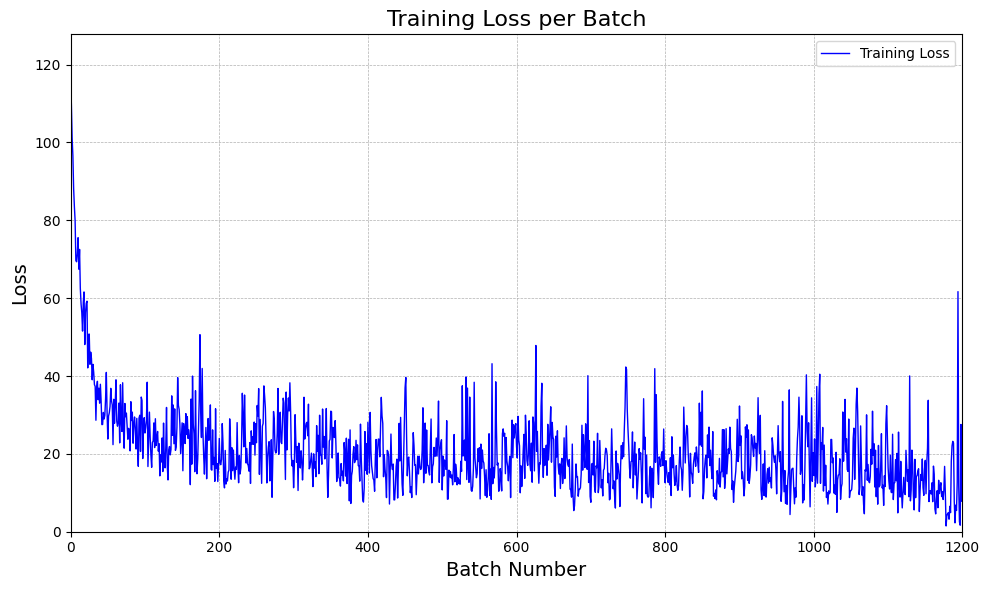

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(np.arange(losses.size), losses, label='Training Loss', color='blue', linestyle='-', linewidth=1)

ax.set_title('Training Loss per Batch', fontsize=16)
ax.set_xlabel('Batch Number', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.set_xlim(0, losses.size)
ax.set_ylim(0, max(losses) * 1.1)

ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

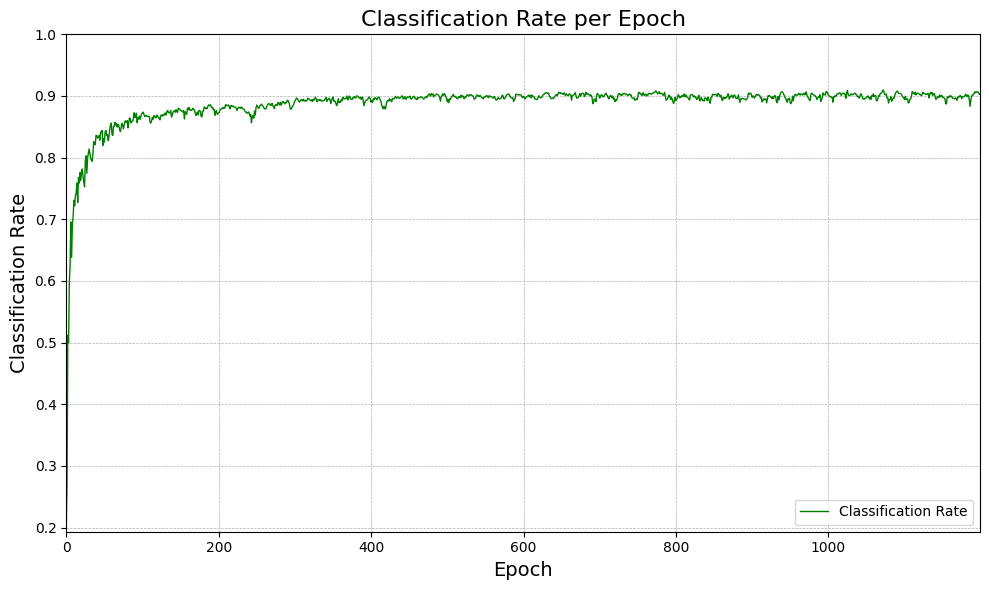

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(np.arange(classification_rates.size), classification_rates, label='Classification Rate', color='green', linestyle='-', linewidth=1)

ax.set_title('Classification Rate per Epoch', fontsize=16)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Classification Rate', fontsize=14)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.set_xlim(0, classification_rates.size - 1)
ax.set_ylim(min(classification_rates) * 0.95, 1.0)

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

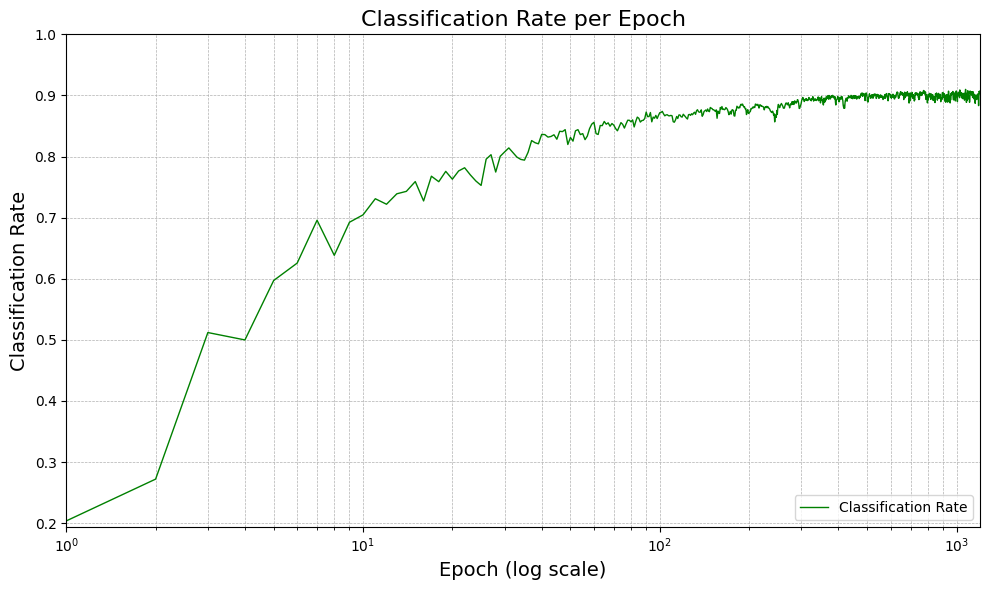

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(np.arange(1, classification_rates.size + 1), classification_rates, label='Classification Rate', color='green', linestyle='-', linewidth=1)

ax.set_title('Classification Rate per Epoch', fontsize=16)
ax.set_xlabel('Epoch (log scale)', fontsize=14)
ax.set_ylabel('Classification Rate', fontsize=14)

ax.set_xscale('log')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.set_xlim(1, classification_rates.size)
ax.set_ylim(min(classification_rates) * 0.95, 1.0)

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [23]:
preds = nn.forward_propagation(test_images)
preds_labels = np.argmax(preds, axis=0)

correct_idx = np.where(preds_labels == test_labels)[0]
incorrect_idx = np.where(preds_labels != test_labels)[0]

correct_to_show_n = 20
incorrect_to_show_n = 20

correct_to_show = test_images[correct_idx[:correct_to_show_n]]
incorrect_to_show = test_images[incorrect_idx[:incorrect_to_show_n]]

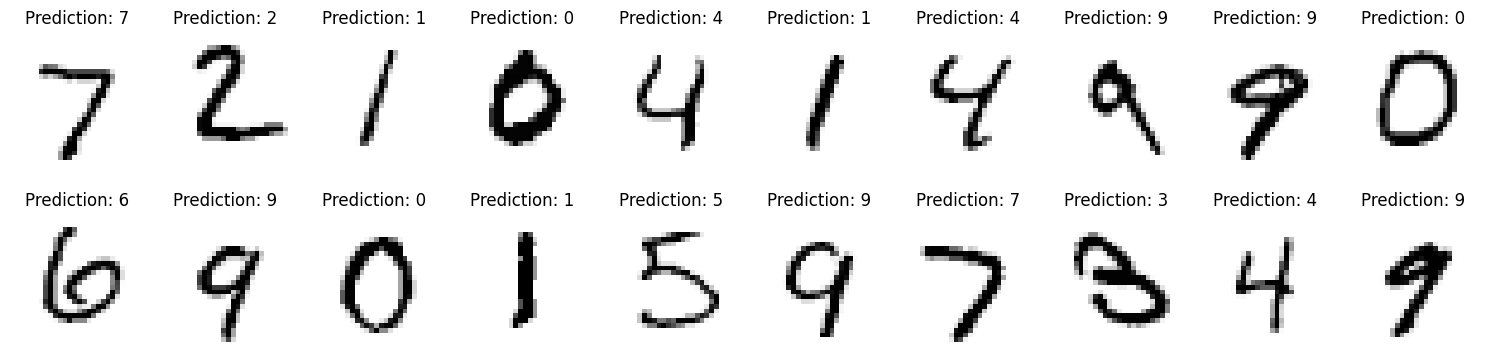

In [24]:
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(correct_to_show[i].reshape(28, 28), cmap='Grays')
    prediction = preds_labels[correct_idx[i]]
    ax.set_title(f'Prediction: {prediction}')
    ax.axis('off')

plt.tight_layout()
plt.show()

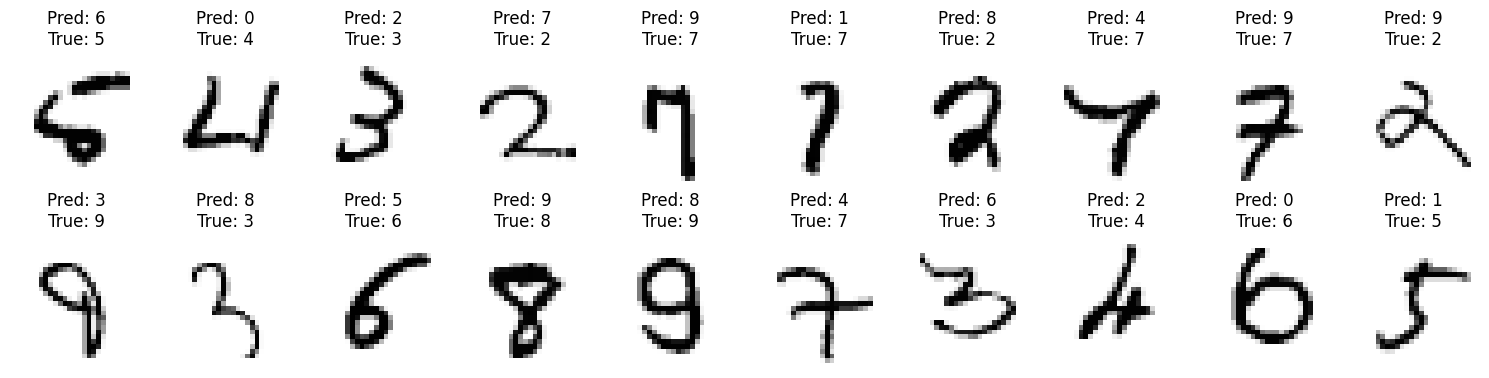

In [25]:
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(incorrect_to_show[i].reshape(28, 28), cmap='Grays')
    prediction = preds_labels[incorrect_idx[i]]
    ax.set_title(f'Pred: {prediction}\nTrue: {test_labels[incorrect_idx[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [26]:
def find_most_incorrect_digits(nn, images, labels):
    probs = nn.forward_propagation(images)
    predicted_labels = np.argmax(probs, axis=0)
    confidences = np.max(probs, axis=0)

    most_incorrect_per_digit = {digit: [] for digit in range(10)}
    incorrect_indices = np.where(predicted_labels != labels)[0]

    for idx in incorrect_indices:
        true_label = labels[idx]
        predicted_label = predicted_labels[idx]
        confidence = confidences[idx]
        most_incorrect_per_digit[true_label].append((idx, predicted_label, true_label, confidence))

    for digit in most_incorrect_per_digit:
        most_incorrect_per_digit[digit].sort(key=lambda x: x[3], reverse=True)

    return most_incorrect_per_digit

most_incorrect = find_most_incorrect_digits(nn, test_images, test_labels)
# number_most_incorrect = { k: len(l) for k, l in most_incorrect.items() }

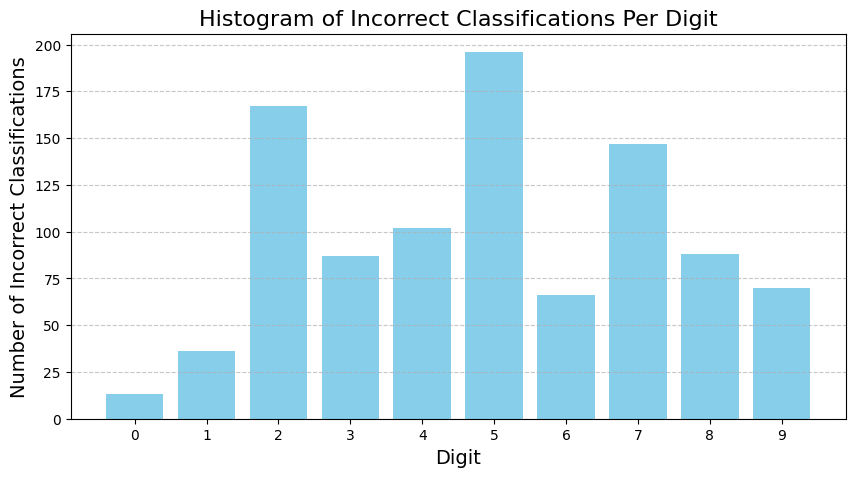

In [27]:
digits = list(most_incorrect.keys())
counts = [len(v) for v in most_incorrect.values()]

plt.figure(figsize=(10, 5))
plt.bar(digits, counts, color='skyblue')
plt.xlabel('Digit', fontsize=14)
plt.ylabel('Number of Incorrect Classifications', fontsize=14)
plt.title('Histogram of Incorrect Classifications Per Digit', fontsize=16)
plt.xticks(digits, [str(digit) for digit in digits])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Part 6

You can visualize what the network is doing by visualizing the W's as if they were digits. Visualize each of the set of W's that connect to o0, the set of W's that
connect to o1, etc, with each w_ji displayed at an appropriate pixel. For example, for the W's that connect to o3, I obtain the following image.

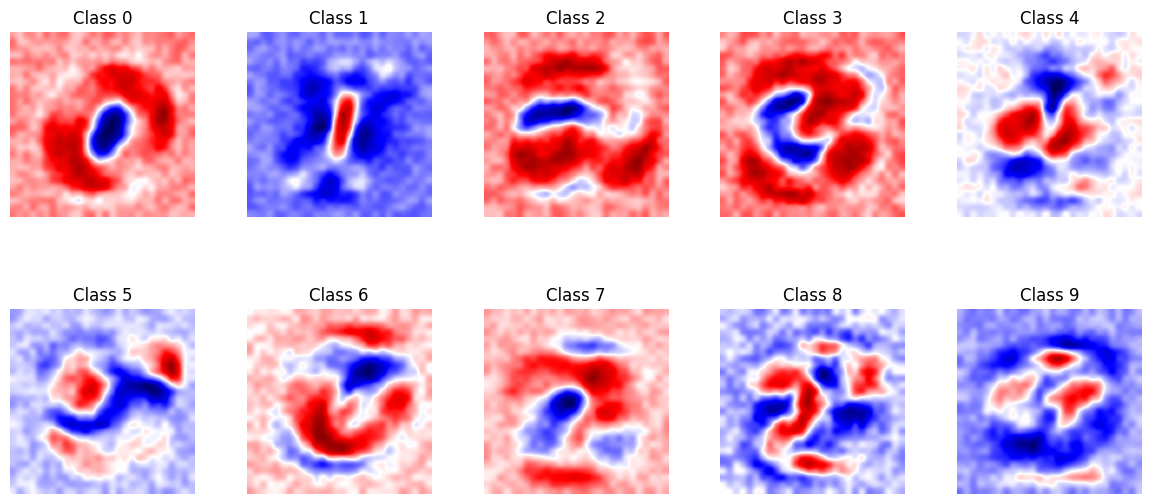

In [28]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(nn.n2):
    ax = axes[i]
    weight_image = nn.W[:, i].reshape(28, 28)
    im = ax.imshow(weight_image, cmap='seismic', interpolation='gaussian')
    ax.axis('off')
    ax.set_title(f'Class {i}')

plt.subplots_adjust(hspace=0.5, wspace=0.1)
plt.show()

# Part 7
For this part, you will implement a neural network with a hidden layer for digit classification. Specifically, you should implement the network sketched below, using
tanh activation functions and 300 hidden units

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

from matplotlib import pyplot as plt

In [7]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(784, activation='tanh'),  
    Dense(300, activation='tanh'),  
    Dense(10, activation='softmax') 
])

model.compile(
    optimizer=SGD(),  
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy'] 
)

model.summary()

/home/ivanz/Desktop/stat_ml_project/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 853,950 (3.26 MB)

 Trainable params: 853,950 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

# Part 8

Usisneg mini-batch gradient descent, using the training set provided to you. You should be able to obtain test
classification performance of over 95% correct classification. A learning rate of about 0.01 and batch sizes of 50 should work well.

In [8]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
history = model.fit(x_train, y_train, batch_size=50, epochs=40, validation_split=0.2)

Epoch 1/40
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7982 - loss: 0.6998 - val_accuracy: 0.9197 - val_loss: 0.2926
Epoch 2/40
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9178 - loss: 0.2898 - val_accuracy: 0.9292 - val_loss: 0.2476
Epoch 3/40
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9315 - loss: 0.2429 - val_accuracy: 0.9349 - val_loss: 0.2316
Epoch 4/40
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9335 - loss: 0.2309 - val_accuracy: 0.9373 - val_loss: 0.2149
Epoch 5/40
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9370 - loss: 0.2156 - val_accuracy: 0.9405 - val_loss: 0.2096
Epoch 6/40
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9399 - loss: 0.2073 - val_accuracy: 0.9430 - val_loss: 0.2013
Epoch 7/40
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9410 - loss: 0.1970 - val_accuracy: 0.9404 - val_loss: 0.2020
Epoch 8/40
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9432 - loss: 0.1967 - val_accuracy: 0.

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9480 - loss: 0.1644
Test Loss: 0.14988984167575836
Test Accuracy: 0.954200029373169


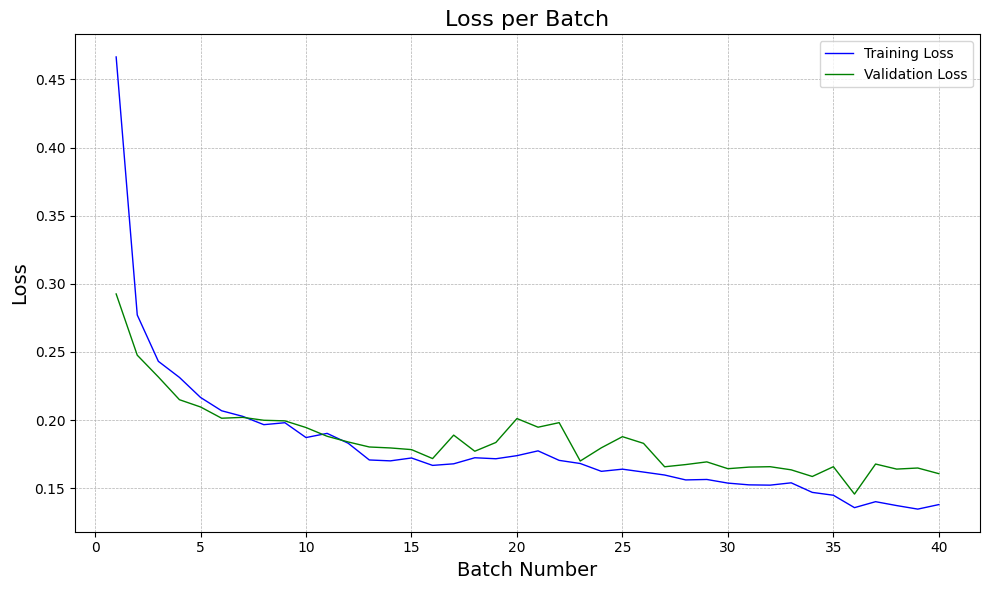

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(np.arange(len(history.history['loss'])) + 1, history.history['loss'], label='Training Loss', color='blue', linestyle='-', linewidth=1)
ax.plot(np.arange(len(history.history['val_loss'])) + 1, history.history['val_loss'], label='Validation Loss', color='green', linestyle='-', linewidth=1)


ax.set_title('Loss per Batch', fontsize=16)
ax.set_xlabel('Batch Number', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

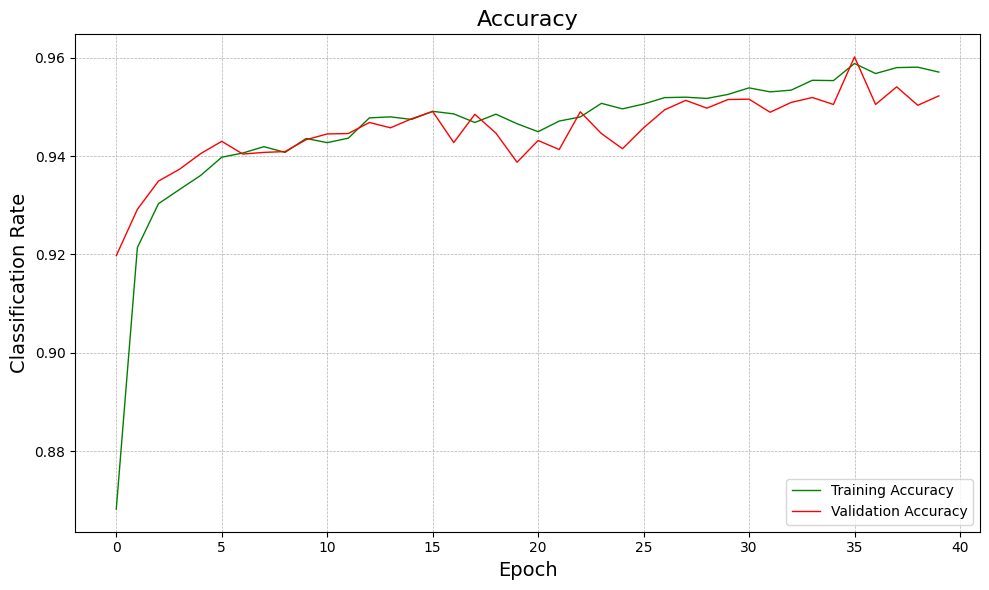

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(np.arange(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy', color='green', linestyle='-', linewidth=1)
ax.plot(np.arange(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='-', linewidth=1)

ax.set_title('Accuracy', fontsize=16)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Classification Rate', fontsize=14)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


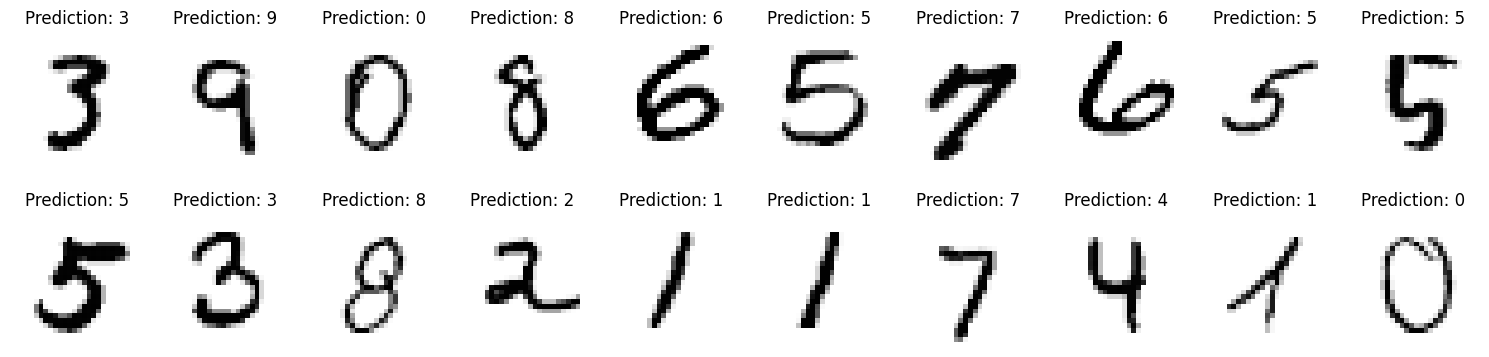

In [26]:
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

correct_indices = np.where(predicted_classes == y_test)[0]
incorrect_indices = np.where(predicted_classes != y_test)[0]

np.random.shuffle(correct_indices)
np.random.shuffle(incorrect_indices)


for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[correct_indices[:20][i]].reshape(28, 28), cmap='Grays')
    prediction = predicted_classes[correct_indices[:20][i]]
    ax.set_title(f'Prediction: {prediction}')
    ax.axis('off')

plt.tight_layout()
plt.show()

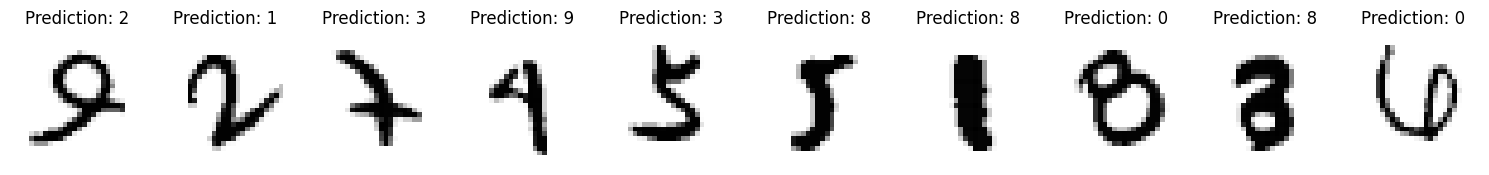

In [27]:
fig, axes = plt.subplots(1, 10, figsize=(15, 4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[incorrect_indices[:10][i]].reshape(28, 28), cmap='Grays')
    prediction = predicted_classes[incorrect_indices[:10][i]]
    ax.set_title(f'Prediction: {prediction}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [41]:
model.layers[1].get_weights()[0].shape

(784, 784)

In [44]:
def show_weights(start, number=30):
    fig, axes = plt.subplots(3, 10, figsize=(20, 15))
    axes = axes.flatten()

    weights = model.layers[1].get_weights()[0]

    for i in range(start, start + number):
        ax = axes[i - start]
        weight_image = weights[:, i].reshape(28, 28)
        ax.imshow(weight_image, cmap='coolwarm', interpolation='gaussian')
        ax.axis('off')
        ax.set_title(f'Ws {i}')

    plt.subplots_adjust(hspace=0.5, wspace=0.1)
    plt.show()

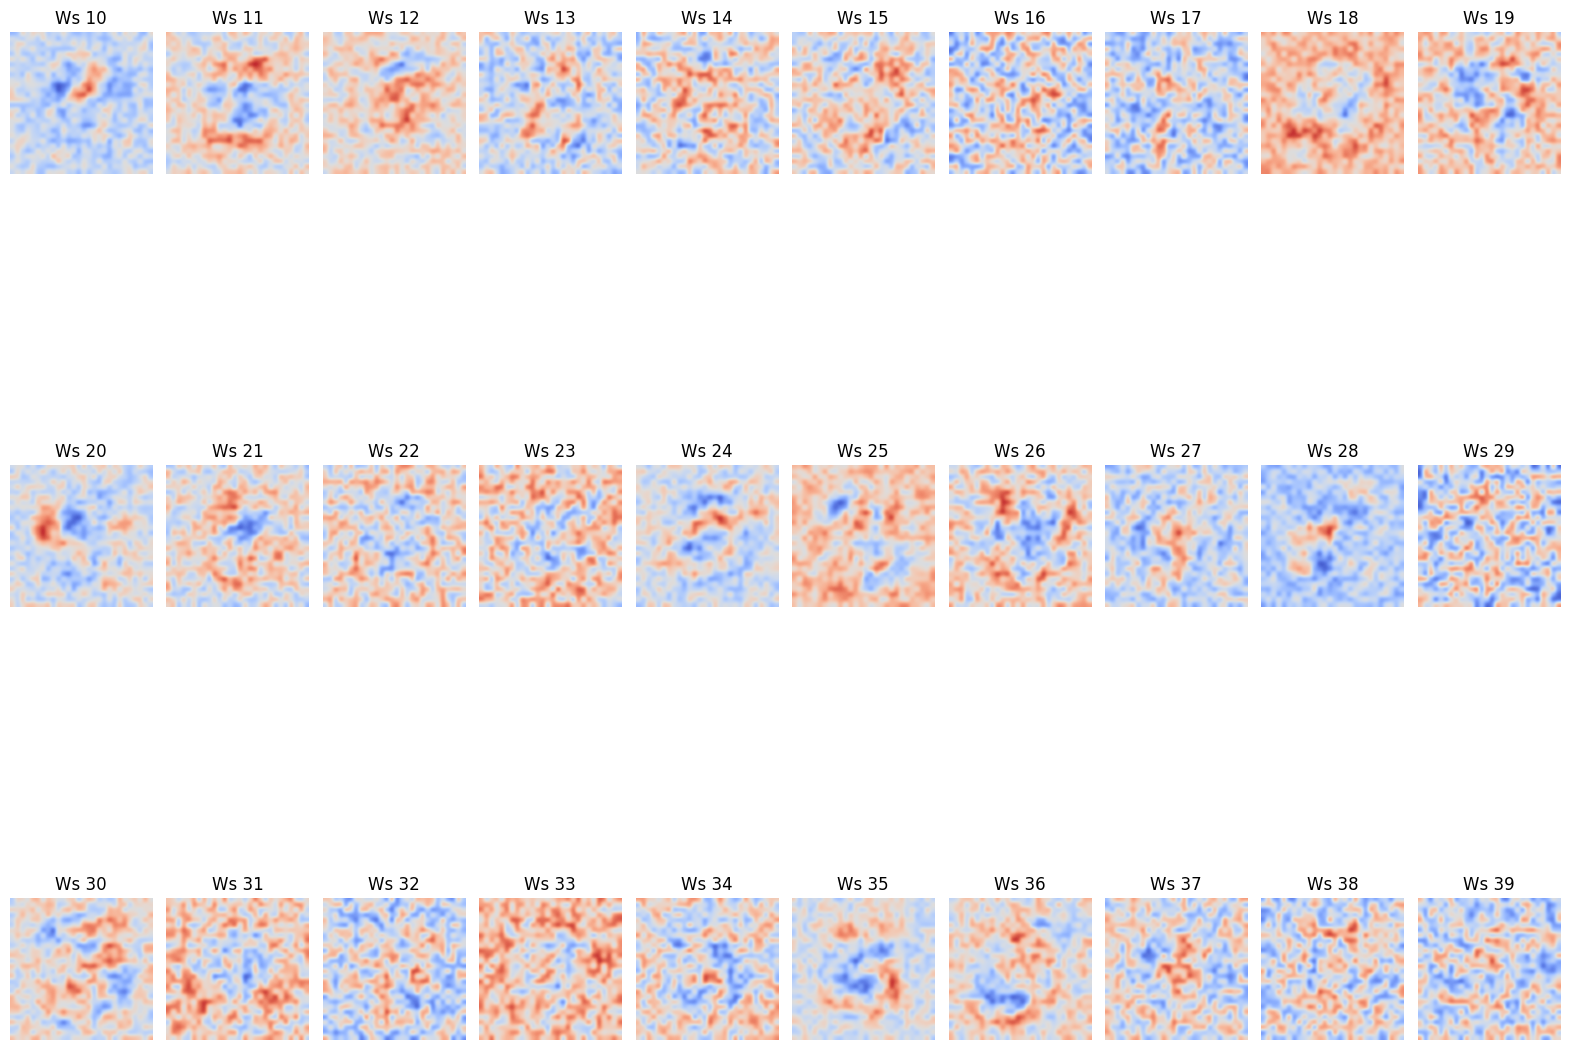

In [45]:
show_weights(10)